[IPython Notebook](reflection_heating.ipynb) |  [Python Script](reflection_heating.py)

Reflection and Heating
============================

Setup
-----------------------------

As always, let's do imports and initialize a logger and a new bundle.  See [Building a System](../tutorials/building_a_system.html) for more details.

In [1]:
%matplotlib inline

In [2]:
import phoebe
from phoebe import u # units
import numpy as np
import matplotlib.pyplot as plt

logger = phoebe.logger(clevel='INFO')

b = phoebe.Bundle.default_binary()

/usr/local/lib/python2.7/dist-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)
/usr/local/lib/python2.7/dist-packages/astropy/units/quantity.py:732: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  return super(Quantity, self).__eq__(other)


Relevant Parameters
---------------------------------

In [3]:
print b['alb_refl_bol']

ParameterSet: 2 parameters
  alb_refl_bol@primary@component: 0.0
  alb_refl_bol@secondary@comp...: 0.0


In [4]:
print b['alb_lost_bol']

ParameterSet: 4 parameters
* alb_lost_bol@primary@component: 1.0
  alb_lost_bol@primary@constr...: 1.000000 - {alb_refl_bol@primary@component}
* alb_lost_bol@secondary@comp...: 1.0
  alb_lost_bol@secondary@cons...: 1.000000 - {alb_refl_bol@secondary@component}


In [5]:
print b['alb_refl_bol@primary']

Parameter: alb_refl_bol@primary@component
                       Qualifier: alb_refl_bol
                     Description: ratio of incident bolometric light that is used for reflection (heating without redistribution)
                           Value: 0.0
                  Constrained by: 
                      Constrains: alb_lost_bol@primary@component
                      Related to: alb_lost_bol@primary@component



In [6]:
print b['alb_lost_bol@primary@component']

Parameter: alb_lost_bol@primary@component
                       Qualifier: alb_lost_bol
                     Description: ratio of incident bolometric light that is lost/ignored
                           Value: 1.0
                  Constrained by: alb_refl_bol@primary@component
                      Constrains: None
                      Related to: alb_refl_bol@primary@component



In [7]:
b.set_value_all('alb_refl_bol', 0.3)

In [8]:
b.add_compute()

<ParameterSet: 26 parameters | components: _default, primary, secondary>

In [9]:
print b['refl']

Parameter: refl@phoebe01@compute
                       Qualifier: refl
                     Description: Enable reflection/heating/scattering
                           Value: False



Influence on Light Curves (fluxes)
---------------------------------

In [10]:
b.add_dataset('LC', time=np.linspace(0,3,101))

<ParameterSet: 20 parameters | contexts: compute, dataset>

In [11]:
b.run_compute(refl=False, delta=0.2, model='refl_false')

<ParameterSet: 2 parameters | qualifiers: flux, time>

In [12]:
b.run_compute(refl=True, delta=0.2, model='refl_true')

<ParameterSet: 2 parameters | qualifiers: flux, time>

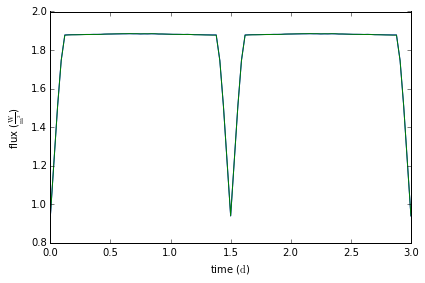

In [15]:
axs, artists = b.plot()

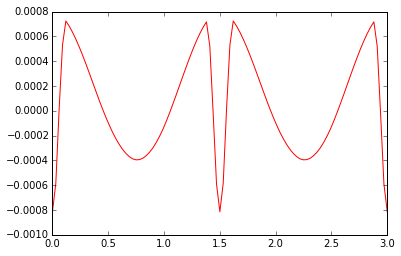

In [17]:
artists = plt.plot(b['value@time@refl_false'], b['value@flux@refl_true']-b['value@flux@refl_false'], 'r-')